# Programming Assignment
## Graphical Summaries and Data Wrangling

***

In this assignment you will apply some basic Pandas tools to perform graphical summaries on the `Boulder Weather Data`. This will be the same data set form the previous assignment. 

Once you have completed the assignment, you will need to download as a pdf and upload to the subsequent peer review for grading.

First, you will load Numpy and Pandas using their common aliases, `np` and `pd`. 

In [1]:
import numpy as np 
import pandas as pd

You will also need to load `Matplotlib's Pylab library` and to set up Jupyter so that it will plot directly in the notebook.  

In [2]:
import matplotlib.pylab as plt
%matplotlib inline

First, load the weather data into a Pandas DataFrame using `read_csv( )`.  

In [3]:
# Two different paths to the data 
local_path = 'clean_boulder_weather.csv'

# Load the data into a DataFrame 
dfW= pd.read_csv(local_path)

# Inspect some of the data
dfW.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USW00094075,"BOULDER 14 W, CO US",2017-07-01,0.00,68.0,31.0
1,USW00094075,"BOULDER 14 W, CO US",2017-07-02,0.00,73.0,35.0
2,USW00094075,"BOULDER 14 W, CO US",2017-07-03,0.00,68.0,46.0
3,USW00094075,"BOULDER 14 W, CO US",2017-07-04,0.05,68.0,43.0
4,USW00094075,"BOULDER 14 W, CO US",2017-07-05,0.01,73.0,40.0


Recall that the data has the following columns: 

- **STATION**: The unique identification code for each weather station 
- **NAME**: The location / name of the weather station 
- **DATE**: The date of the observation 
- **PRCP**: The precipitation (in inches)
- **TMAX**: The daily maximum temperature (in Fahrenheit)
- **TMIN**: The daily minimum temperature (in Fahrenheit)

And recall that the data set contains data from several weather stations.  Their names were

In [4]:
station_names = list(set(dfW["NAME"]))
print("Station Names: ", station_names)

Station Names:  ['SUGARLOAF COLORADO, CO US', 'NIWOT, CO US', 'RALSTON RESERVOIR, CO US', 'GROSS RESERVOIR, CO US', 'NORTHGLENN, CO US', 'BOULDER 14 W, CO US', 'BOULDER, CO US']


### Histograms of Maximum Temperature 

If you desire to draw a histogram of the **TMAX** characteristics over all weather stations.  There are several ways to plot histograms in Python.  We will use Pandas built-in histogram function because it is designed to handle missing data well, but Matplotlib has a [native hist( )](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function that you can use if you prefer. Furthermore, the Pandas' `hist( )` function actually calls the Matplotlib `hist( )` function internally, so any parameters that work with Matplotlib's function should work with the Pandas function. 

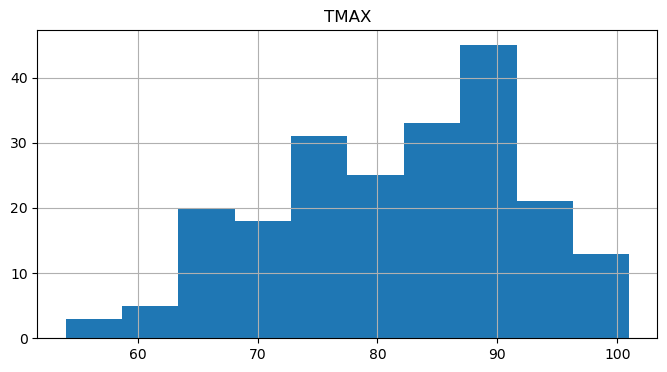

In [5]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram 
dfW.hist(column="TMAX", ax=ax);

Here we've made a simple histogram of the **TMAX** data using Pandas' `hist( ) function`.  Notice that we call the `hist( )` function on the entire DataFrame and then indicate which column we want to use using the $\texttt{column}$ option.  We then pass in the figure axis to the function so that we can make modifications to the layout later on. 

Pandas' automatic bin selection is reliable, however if you desire to define your own bins you can do so by passing in an optional $\texttt{bins}$ argument to hist( ).  

Both options are to pass in an integer value for the number of bins you want _or_ a list specifying the bin edges. Suppose for example we want bins of width 5 starting at 50 and ending at 110.  We could do the following:  

In [6]:
my_bins = range(50,115,5)
print("bin edges = ", list(my_bins))

bin edges =  [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]


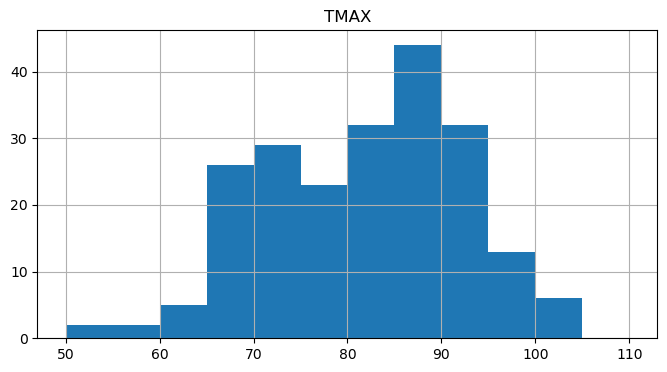

In [7]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram 
dfW.hist(column="TMAX", ax=ax, bins=my_bins);

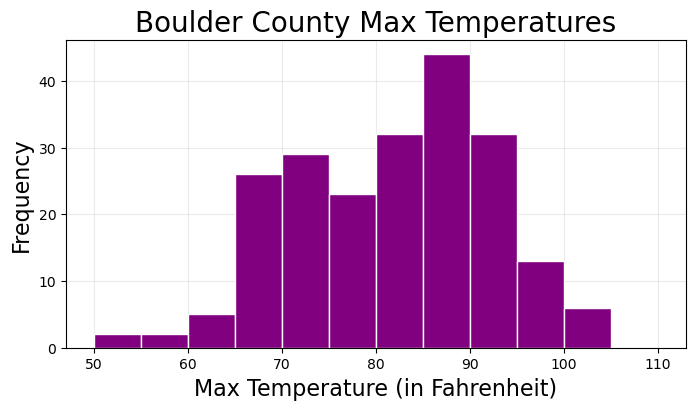

In [8]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram with custom colors
dfW.hist(column="TMAX", ax=ax, bins=my_bins, facecolor="purple", edgecolor="white")

# Add a title
ax.set_title("Boulder County Max Temperatures", fontsize=20)

# Add axis labels 
ax.set_xlabel("Max Temperature (in Fahrenheit)", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

# Make the grid lines lighter and put them behind data 
ax.grid(alpha=0.25)
ax.set_axisbelow(True)


Dide-by-side or stacked histograms are a good way to compare two sets of data.  Let's create histograms of **TMAX** for data from two different weather stations and stack them on top of each other.  Note that in order to make a true comparison it's a good idea to set the range on the horizontal and vertical axes to be the same on both plots. For this experiment we'll use the data from the `NORTHGLENN` and `GROSS RESERVOIR` weather stations. 

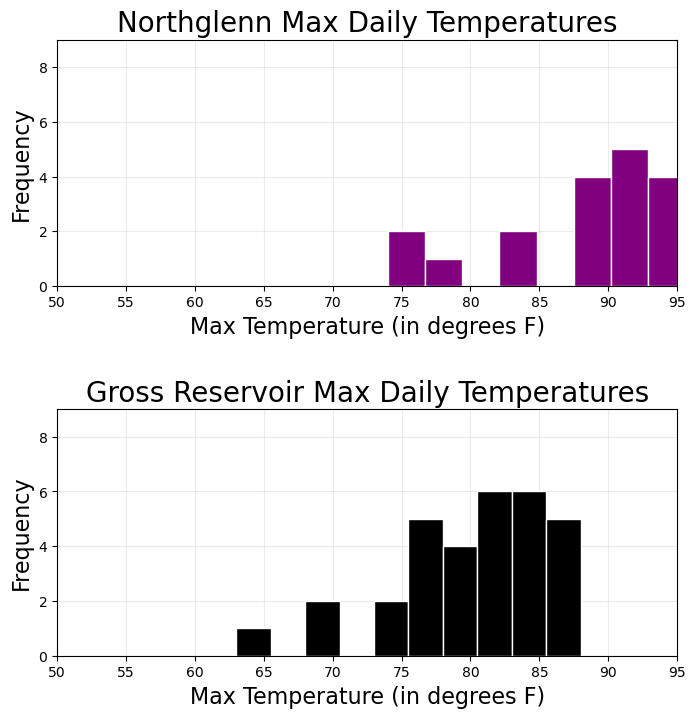

In [9]:
# Initialize figure subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

# --------------------------------------
# Plot histogram for Northglenn on Top 
# --------------------------------------
dfW.loc[dfW["NAME"]=="NORTHGLENN, CO US"].hist(column="TMAX", ax=axes[0], facecolor="purple", edgecolor="white")
                                                      
# Add titles and labels 
axes[0].set_title("Northglenn Max Daily Temperatures", fontsize=20)
axes[0].set_xlabel("Max Temperature (in degrees F)", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

# --------------------------------------
# Plot histogram for Sugarloaf on Bottom 
# --------------------------------------
dfW.loc[dfW["NAME"]=="GROSS RESERVOIR, CO US"].hist(column="TMAX", ax=axes[1], facecolor="black", edgecolor="white")
                                                      
# Add titles and labels 
axes[1].set_title("Gross Reservoir Max Daily Temperatures", fontsize=20)
axes[1].set_xlabel("Max Temperature (in degrees F)", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

# --------------------------------------
# Make the plots comparable 
# --------------------------------------

# Set x and y axis limits to match
axes[0].set_xlim([50,95])
axes[1].set_xlim([50,95])
axes[0].set_ylim([0,9])
axes[1].set_ylim([0,9]);

# Adjust vertical space so titles/axis labels don't overlap 
fig.subplots_adjust(hspace=.5)

Observe that because we set the horizontal and vertical axis ranges to be the same we can easily make visual comparisons between the data. For instance it can be observed that it is generally warmer in the gross resevoir than in northglenn. 

### Exercise 1
***
Create stacked histograms comparing the minimum temperatures at `Niwot` and `Ralston Resevoir`. Feel free to adjust different parameters until you find a style and color scheme that you like.  Don't forget to add meaningful titles and axis labels! Your histograms should look similar to the following: 

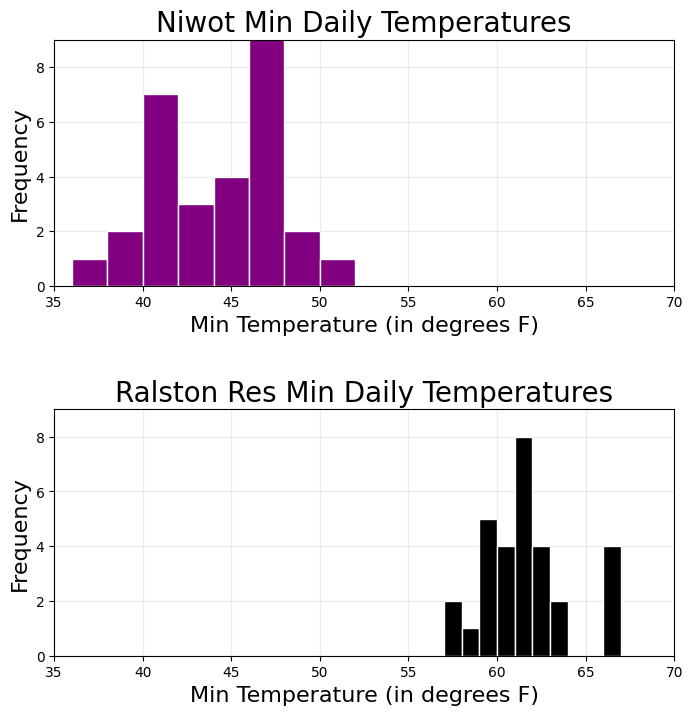


['USS0005J42S']
['USC00056816']
Niwot Data:
        STATION          NAME        DATE  PRCP  TMAX  TMIN
93  USS0005J42S  NIWOT, CO US  2017-07-01   0.0  69.0  32.0
94  USS0005J42S  NIWOT, CO US  2017-07-02   0.0  73.0  37.0
95  USS0005J42S  NIWOT, CO US  2017-07-03   0.0  68.0  47.0
96  USS0005J42S  NIWOT, CO US  2017-07-04   0.1  70.0  41.0
97  USS0005J42S  NIWOT, CO US  2017-07-05   0.0  74.0  40.0
Ralston Data:
         STATION                      NAME        DATE  PRCP  TMAX  TMIN
154  USC00056816  RALSTON RESERVOIR, CO US  2017-07-02   0.0  84.0  61.0
155  USC00056816  RALSTON RESERVOIR, CO US  2017-07-03   0.0  87.0  58.0
156  USC00056816  RALSTON RESERVOIR, CO US  2017-07-04   0.0  87.0  59.0
157  USC00056816  RALSTON RESERVOIR, CO US  2017-07-05   0.0  91.0  61.0
158  USC00056816  RALSTON RESERVOIR, CO US  2017-07-06   0.0  94.0  62.0


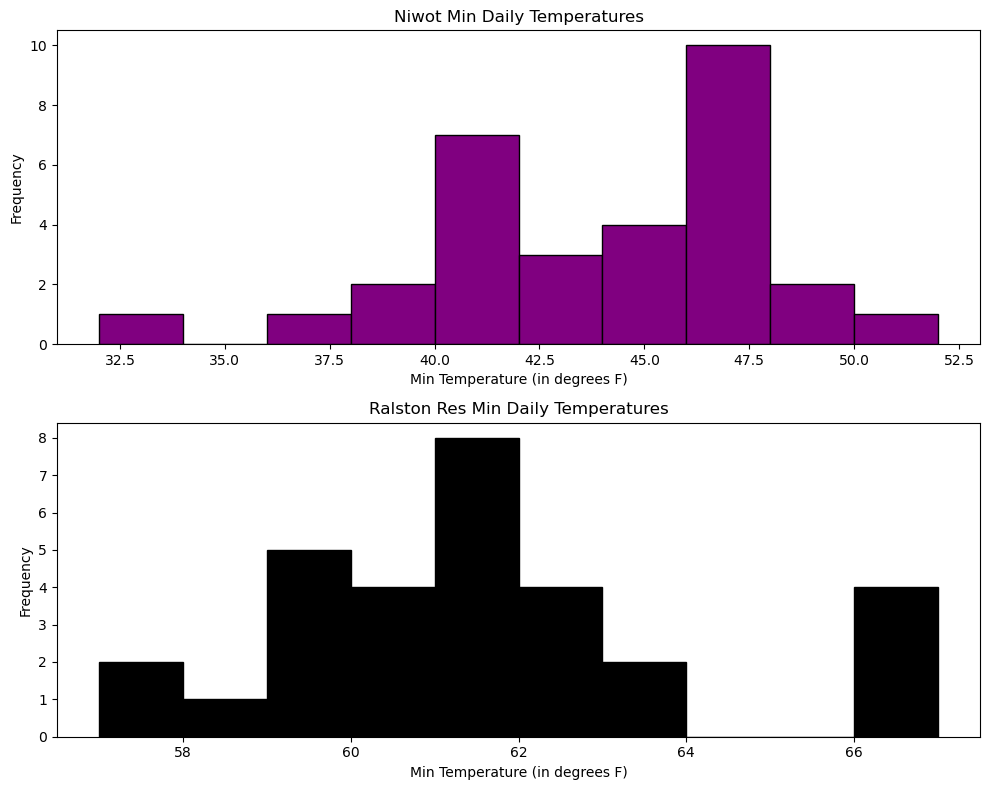

In [16]:
# Check which station IDs map to the names 'NIWOT, CO US' and 'RALSTON RESERVOIR, CO US'
print(dfW[dfW['NAME'] == 'NIWOT, CO US']['STATION'].unique())
print(dfW[dfW['NAME'] == 'RALSTON RESERVOIR, CO US']['STATION'].unique())

# Replace these with the correct station IDs identified in Step 2
niwot_station = 'USS0005J42S'  # Example station ID for Niwot
ralston_station = 'USC00056816'  # Example station ID for Ralston

# Filter the data for Niwot and Ralston
niwot_data = dfW[dfW['STATION'] == niwot_station]
ralston_data = dfW[dfW['STATION'] == ralston_station]


# Check if there is data for TMIN for both stations
print("Niwot Data:")
print(niwot_data.head())
print("Ralston Data:")
print(ralston_data.head())

# Drop any missing values for TMIN
niwot_temps = niwot_data['TMIN'].dropna()
ralston_temps = ralston_data['TMIN'].dropna()

# Ensure the TMIN columns are numeric
niwot_temps = pd.to_numeric(niwot_temps, errors='coerce')
ralston_temps = pd.to_numeric(ralston_temps, errors='coerce')

# Create the stacked histograms
plt.figure(figsize=(10, 8))

# First subplot for Niwot
plt.subplot(2, 1, 1)
plt.hist(niwot_temps, bins=10, color='purple', edgecolor='black')
plt.title('Niwot Min Daily Temperatures')
plt.xlabel('Min Temperature (in degrees F)')
plt.ylabel('Frequency')

# Second subplot for Ralston Reservoir
plt.subplot(2, 1, 2)
plt.hist(ralston_temps, bins=10, color='black', edgecolor='black')
plt.title('Ralston Res Min Daily Temperatures')
plt.xlabel('Min Temperature (in degrees F)')
plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

After you've gotten some decent _Frequency_ histograms, pass the parameter **density=True** into the `hist( )` function and redo the plots.  Note that you'll probably have to change the vertical axis limits.  How does the **density=True** parameter change the histograms? 

The following paraments could suffice: 

`axes[0].set_ylim([0,.3])`

`axes[1].set_ylim([0,.3]);`

Note that in recent versions of Matplotlib, the `normed=True` parameter has been deprecated and replaced by the `density=True` parameter when creating histograms. This change was made to improve clarity and consistency in the library's API.

Your new histograms, should look similar to the following: 
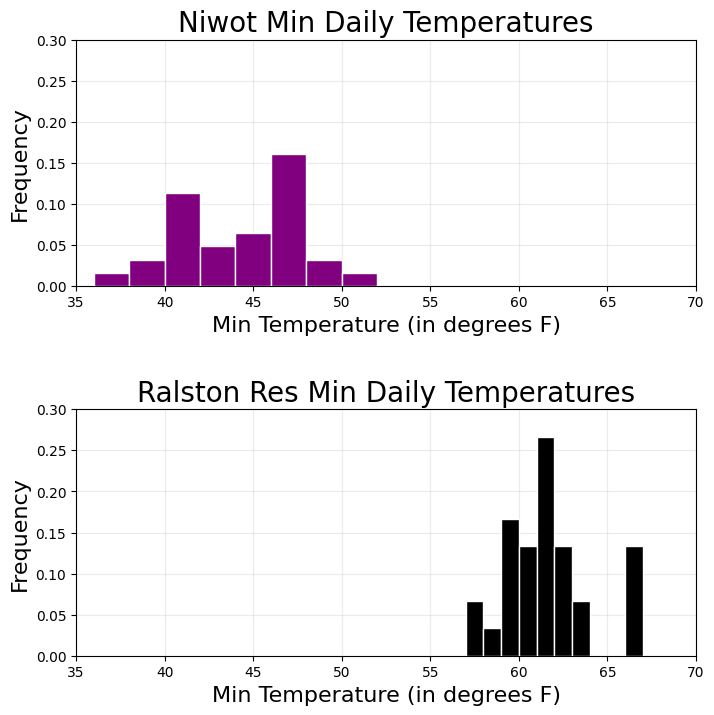

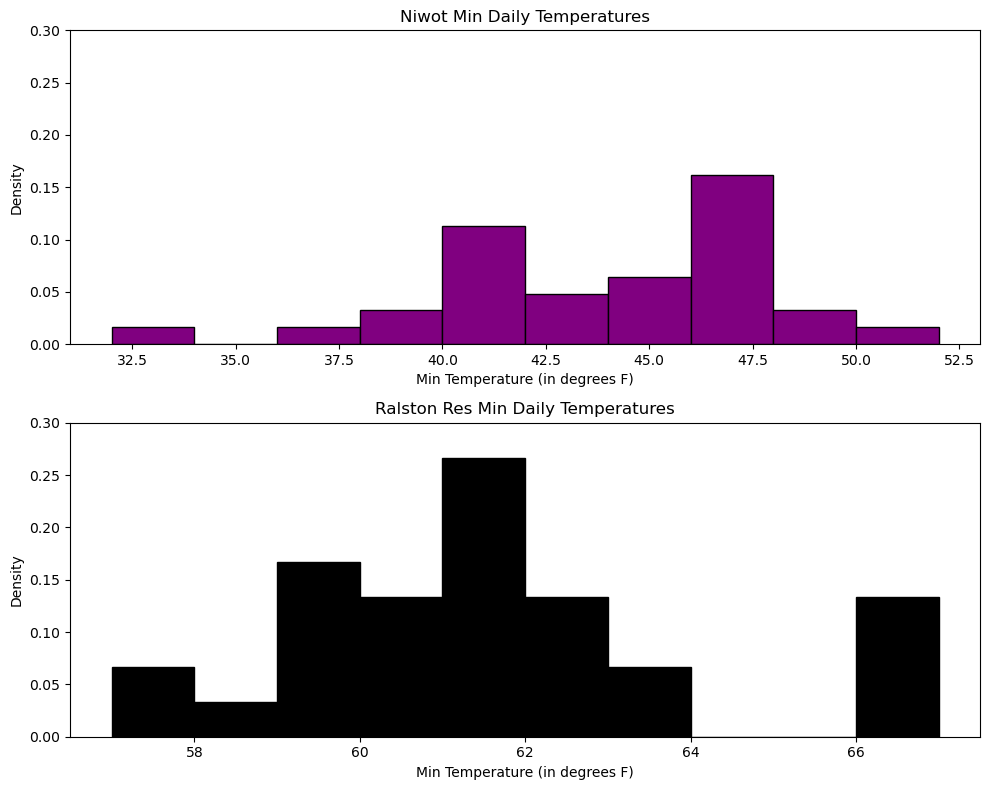

In [38]:
# Create the stacked histograms with density=True
plt.figure(figsize=(10, 8))

# First subplot for Niwot with density=True
plt.subplot(2, 1, 1)
plt.hist(niwot_temps, bins=10, color='purple', edgecolor='black', density=True)
plt.title('Niwot Min Daily Temperatures')
plt.xlabel('Min Temperature (in degrees F)')
plt.ylabel('Density')

# Set the y-axis limits for Niwot
plt.ylim([0, 0.3])

# Second subplot for Ralston Reservoir with density=True
plt.subplot(2, 1, 2)
plt.hist(ralston_temps, bins=10, color='black', edgecolor='black', density=True)
plt.title('Ralston Res Min Daily Temperatures')
plt.xlabel('Min Temperature (in degrees F)')
plt.ylabel('Density')

# Set the y-axis limits for Ralston
plt.ylim([0, 0.3])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


### Exercise 2  
***
Make stacked histograms to compare the maximum temperature over all of **Boulder County** on days when it rained vs days when it did not rain. 

Hint: You will need to make the following arguments: 

1) **Rainy Days**: `dfW.loc[dfW["PRCP"] > 0].hist`...etc 
2) **Non-Rainy Days**: `dfW.loc[dfW["PRCP"]==0].hist`...etc

3) **Make sure to correctly title your plots as you have done in the previous plots with headings, and axis titles both in the x and in the y. There is no need to use the `density=true` function**.

Your histrograms should look similar to the following: 
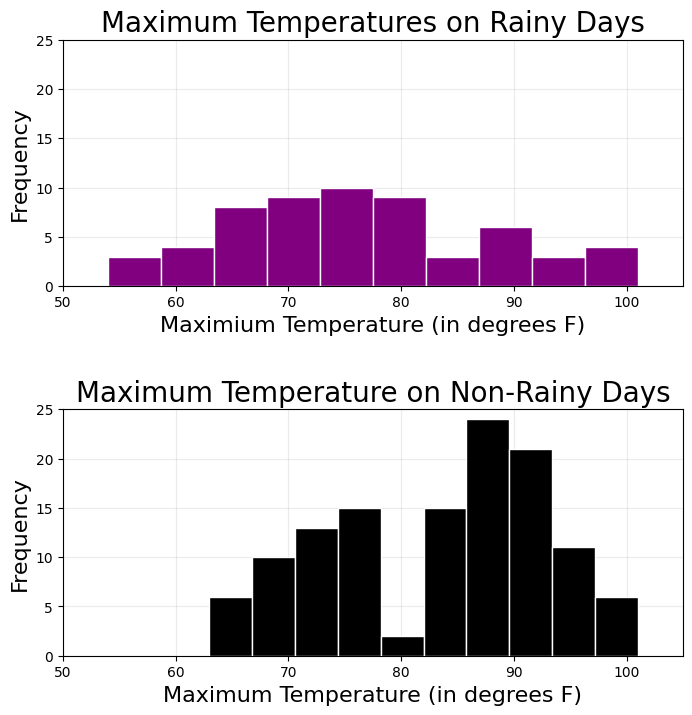

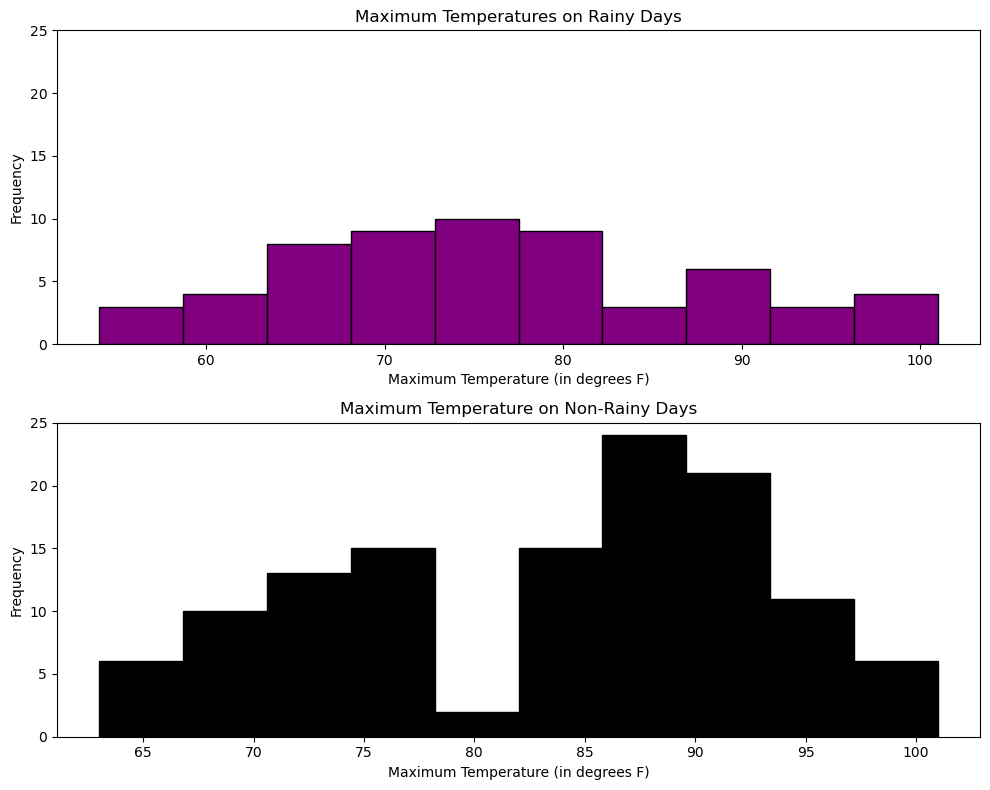

In [39]:
import matplotlib.pyplot as plt

# Create the two subplots stacked vertically
plt.figure(figsize=(10, 8))

# Rainy days: Filter the data where PRCP (precipitation) is greater than 0
rainy_days = dfW.loc[dfW["PRCP"] > 0]

# Non-rainy days: Filter the data where PRCP is equal to 0
non_rainy_days = dfW.loc[dfW["PRCP"] == 0]

# First subplot for Rainy Days
plt.subplot(2, 1, 1)
plt.hist(rainy_days["TMAX"].dropna(), bins=10, color='purple', edgecolor='black')
plt.title('Maximum Temperatures on Rainy Days')
plt.xlabel('Maximum Temperature (in degrees F)')
plt.ylabel('Frequency')
plt.ylim([0, 25])  # Adjust the y-limit to match the example

# Second subplot for Non-Rainy Days
plt.subplot(2, 1, 2)
plt.hist(non_rainy_days["TMAX"].dropna(), bins=10, color='black', edgecolor='black')
plt.title('Maximum Temperature on Non-Rainy Days')
plt.xlabel('Maximum Temperature (in degrees F)')
plt.ylabel('Frequency')
plt.ylim([0, 25])  # Adjust the y-limit to match the example

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Box-and-Whisker Plots of Minimum Temperature 
***

Next we'll look at Pandas' box-and-whisker plot functionality using the `boxplot( )` function.  We'll start by making a box-and-whisker plot for `Northglenn's` **minimum daily temperatures**. Like the `hist( )` function, `boxplot( )` is called on the entire DataFrame, and then we specify which column we're interested in using the **column** parameter.  

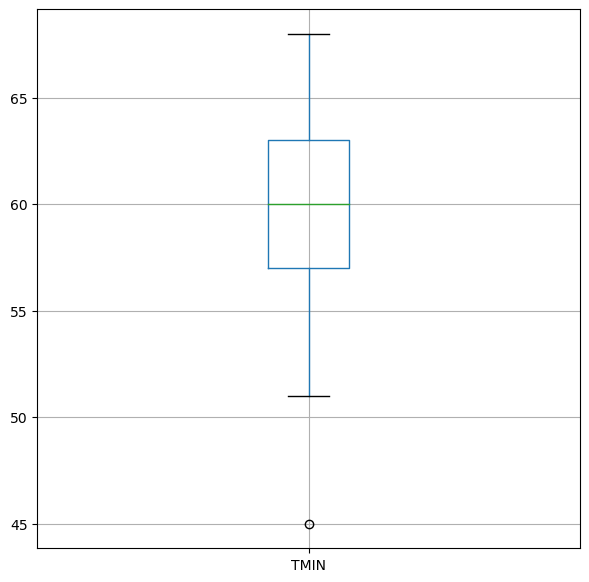

In [11]:
# Initialize figure 
fig = plt.figure(figsize=(7,7))

# Gat axis object 
ax = fig.add_subplot(111)

# Plot histogram 
dfW.loc[dfW["NAME"]=='NORTHGLENN, CO US'].boxplot(column="TMIN", ax=ax);

Note that the result is a standard box-and-whiskers plot with a box spanning the distance between the lower and upper quartiles, a (barely perceptible) median line, whiskers and caps, and outliers that fall more than $1.5 \times IQR$ outside of the nearest quartile. 

Unfortunately, the default parameters don't lend themselves well to easy-to-read plots, so we'll make some minor adjustements. 

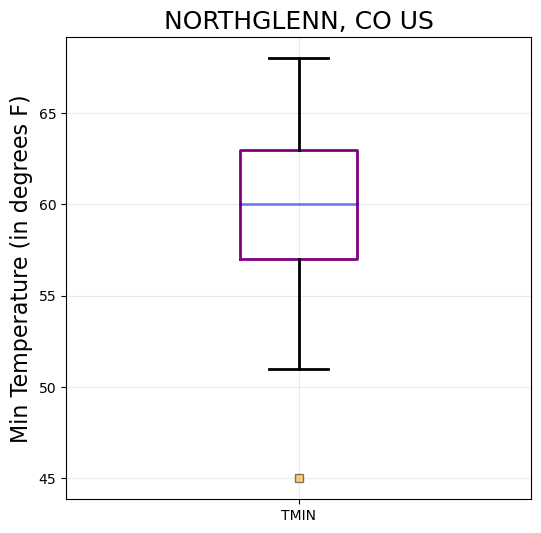

In [12]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(6,6))


# Plot histogram, but this time return dictionary of style parameters for modification after the fact 
bp = dfW.loc[dfW["NAME"]=='NORTHGLENN, CO US'].boxplot(column="TMIN", ax=ax, widths=[.25], return_type='dict');

# ---------------------------------------
# Set properties of various parts of plot 
# ---------------------------------------

# Change properties of boxes 
for box in bp['boxes']:
    box.set(color='purple', linewidth=2)
    
# Change properties of whiskers 
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=2)
    
# Change properties of caps 
for cap in bp['caps']:
    cap.set(color='black', linewidth=2)
    
# Change properties of median 
for cap in bp['medians']:
    cap.set(color='blue', linewidth=2, alpha=0.5)
    
# Change properties of fliers (outliers) 
for flier in bp['fliers']:
    flier.set(markerfacecolor='orange', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('NORTHGLENN, CO US', fontsize=18)
ax.set_ylabel("Min Temperature (in degrees F)", fontsize=16)

# Make grid-lines lighter
ax.grid(alpha=0.25)

Notice that the default settings for `boxplot( )` gives us whiskers and an outlier.  That is, the length of the whiskers are set equal to the largest distance between an observation and the upper or lower quartile that is less than $1.5 \times IQR$.  Any data point beyond this distance is drawn as an outlier (or a _flier_ as Pandas calls them).   

Box-and-whisker plots are great for visualizing the spread of the data, outliers, and skew of the data.  For instance, from this box-and-whisker plot we can tell that the minimum temperature at `Northglenn` has no skew because the the upper quartile $Q_3$ is about the same distance to the median as the lower quartile $Q_1$ is from the median. 

Box-and-whisker plots are especially useful for comparing multiple sets of observations.  For instance, the following side-by-side box-and-whisker plots compare the minimum temperature at `Northglenn` and `Ralston Reservoir`. 

Note that the trick here is to select the rows of the DataFrame corresponding only to `Northglenn` and `Ralston Reservoir` and then call `boxplot( )` with the **by** parameter to break the data into the two sets based on the value of the **NAME** column.  


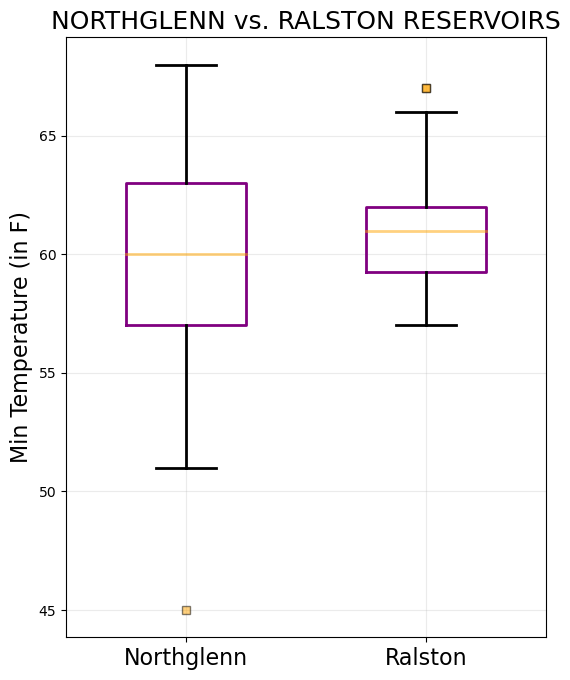

In [13]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(6,8))

# To get just the columns corresponding to Northglenn and Ralston reservoirs, we 
# select only the rows of the DataFrame coresponding to those names, then 
# call boxplot and pass by="NAME" to break the data into the two sets 
bp = dfW.loc[(dfW["NAME"]=='NORTHGLENN, CO US') | (dfW["NAME"]=='RALSTON RESERVOIR, CO US')].boxplot(
    column=["TMIN"], by="NAME", ax=ax, widths=[.5, .5], return_type="dict")

# This time, bp is a Pandas series containing multiple dictionaries
# corresponding to the two sets of data. We loop over each one individually 
# and set the parameters we desire:
for column in bp:
    
    # Change properties in boxes 
    for box in column['boxes']:
        box.set(color='purple', linewidth=2)
    
    # Change properties of whiskers 
    for whisker in column['whiskers']:
        whisker.set(color='black', linewidth=2)

    # Change properties of caps 
    for cap in column['caps']:
        cap.set(color='black', linewidth=2)

    # Change properties of median 
    for cap in column['medians']:
        cap.set(color='orange', linewidth=2, alpha=0.5)

    # Change properties of fliers (outliers) 
    for cap in column['fliers']:
        cap.set(markerfacecolor='orange', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('NORTHGLENN vs. RALSTON RESERVOIRS', fontsize=18)
ax.set_ylabel("Min Temperature (in F)", fontsize=16)

# Set names of plots
plt.xticks([1,2],["Northglenn", "Ralston"], rotation=0, fontsize=16)

# Get rid of automatically generated titles and xlables
plt.suptitle("")
ax.set_xlabel("")

# Make grid-lines lighter
ax.grid(alpha=0.25);

From the side-by-side box-and-whiskers plots we can easily see several things 

- The median min daily temperature at **Ralston Reservoir** is more than 1 degrees warmer than that at **Northglenn**. Not too much of a        difference here 

- The min daily temperature at **Northglenn** does not really have a skew, while the min daily temperature at **Ralston Res** is slightly skewed. Do you think this is positively skewed or negatively skewed? Research the whisker plots! 

- While the overall spreads of the two data sets are comparable, there is some slight but not too much variability at the **Ralston Reservoir** than at **Northglenn**. 

### Exercise 3
***

Plot side-by-side box and whisker plots of the max daily temperature in `Niwot` and `Sugarloaf`.  Comment on any similarities and differences that you see in the distributions of the data. You may use the above exercise as a guide! It is highly encouraged. 

Your plot should look similar to the following: 
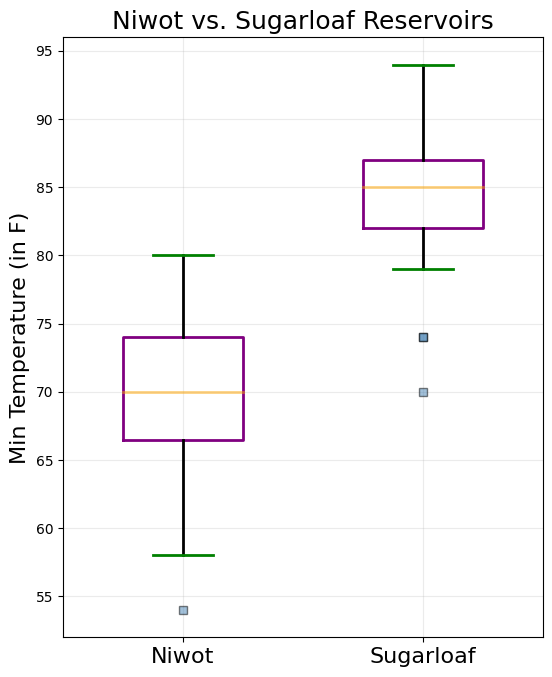

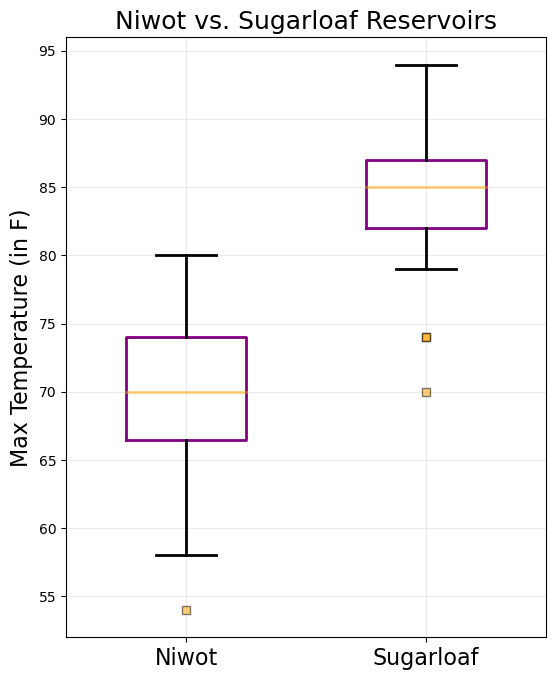

In [40]:
fig, ax = plt.subplots(figsize=(6,8))

# Select only the rows of the DataFrame corresponding to Niwot and Sugarloaf, 
# then call boxplot and pass by="NAME" to break the data into the two sets.
bp = dfW.loc[(dfW["NAME"]=='NIWOT, CO US') | (dfW["NAME"]=='SUGARLOAF COLORADO, CO US')].boxplot(
    column=["TMAX"], by="NAME", ax=ax, widths=[.5, .5], return_type="dict")

# Loop over each column to set properties for the plot.
for column in bp:
    
    # Change properties of boxes
    for box in column['boxes']:
        box.set(color='purple', linewidth=2)

    # Change properties of whiskers
    for whisker in column['whiskers']:
        whisker.set(color='black', linewidth=2)

    # Change properties of caps
    for cap in column['caps']:
        cap.set(color='black', linewidth=2)

    # Change properties of medians
    for cap in column['medians']:
        cap.set(color='orange', linewidth=2, alpha=0.5)

    # Change properties of fliers (outliers)
    for cap in column['fliers']:
        cap.set(markerfacecolor='orange', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('Niwot vs. Sugarloaf Reservoirs', fontsize=18)
ax.set_ylabel("Max Temperature (in F)", fontsize=16)

# Set names of plots
plt.xticks([1,2],["Niwot", "Sugarloaf"], rotation=0, fontsize=16)

# Get rid of automatically generated titles and labels
plt.suptitle("")
ax.set_xlabel("")

# Make grid-lines lighter
ax.grid(alpha=0.25)

# Show the plot
plt.show()

### Exercise 4: Putting it all together
***

Plot side-by-side box and whisker plots of the precipitation measured at **all** weather stations where we have precipitation data (**hint**: it's not all of them. **You will have to decide which one will be excluded!**).  Mess with the plot parameters until you get a reasonable graphic that doesn't look too cramped.  Note that it might be helpful to make the figure much wider and rotate the horizontal labels 90 degrees. 

Your plot should look similar to the following: 
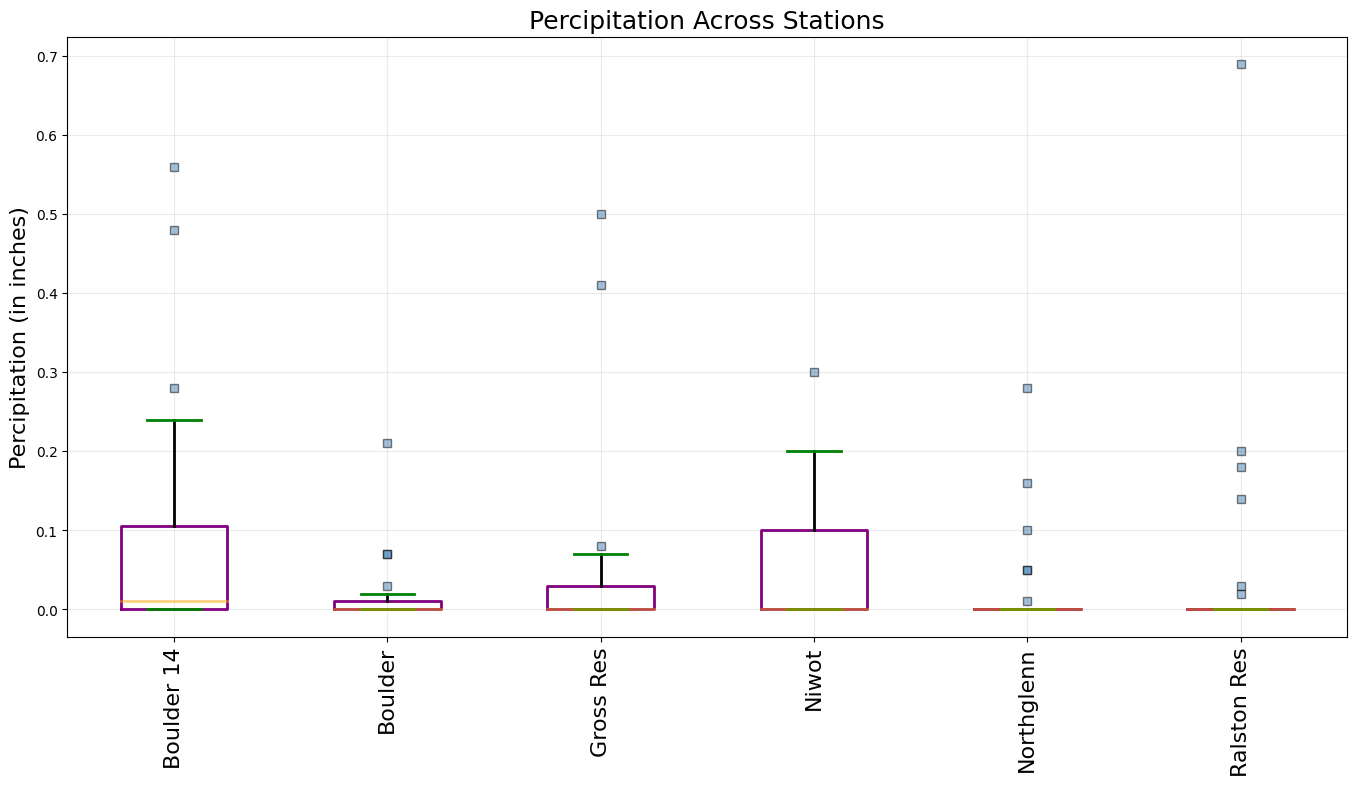

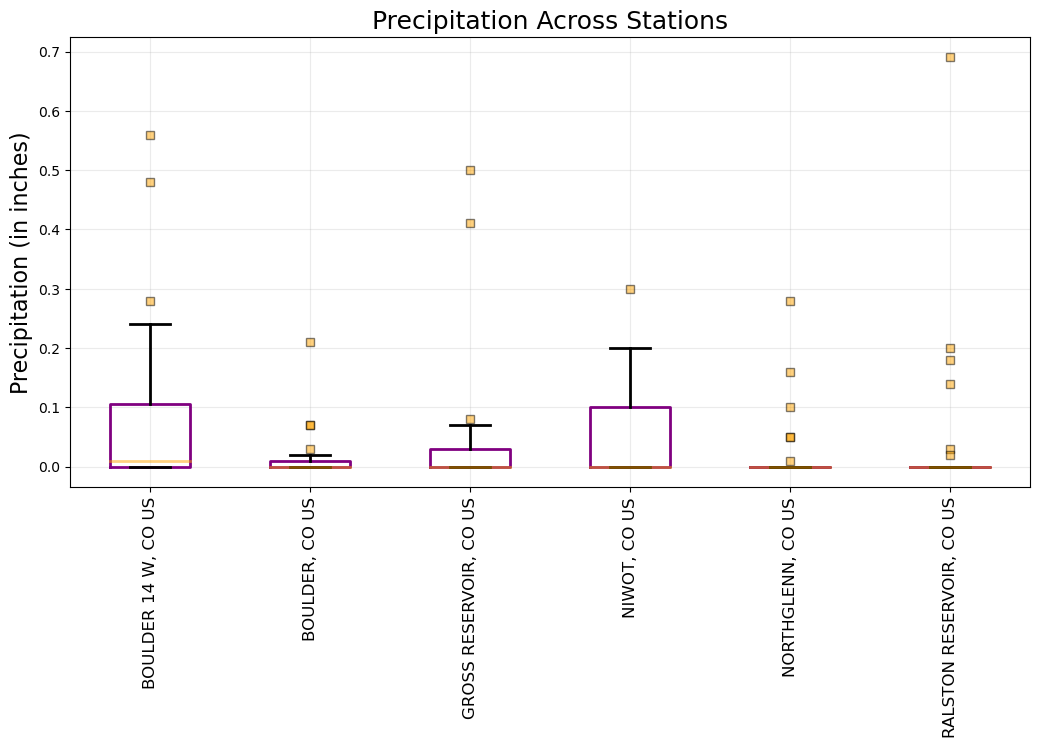

In [41]:
import matplotlib.pyplot as plt

# Filter out stations where there is no precipitation data
dfW_precip = dfW[dfW['PRCP'].notna()]

# Initialize figure
fig, ax = plt.subplots(figsize=(12, 6))  # Wider figure to avoid cramped plots

# Plot box-and-whisker plots of precipitation by station
bp = dfW_precip.boxplot(column="PRCP", by="NAME", ax=ax, widths=[.5]*len(dfW_precip['NAME'].unique()), return_type="dict")

# Adjust the boxplot aesthetics
for column in bp:
    # Change properties of boxes
    for box in column['boxes']:
        box.set(color='purple', linewidth=2)

    # Change properties of whiskers
    for whisker in column['whiskers']:
        whisker.set(color='black', linewidth=2)

    # Change properties of caps
    for cap in column['caps']:
        cap.set(color='black', linewidth=2)

    # Change properties of medians
    for median in column['medians']:
        median.set(color='orange', linewidth=2, alpha=0.5)

    # Change properties of fliers (outliers)
    for flier in column['fliers']:
        flier.set(markerfacecolor='orange', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('Precipitation Across Stations', fontsize=18)
ax.set_ylabel("Precipitation (in inches)", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)

# Get rid of automatically generated titles and labels
plt.suptitle("")
ax.set_xlabel("")

# Make grid-lines lighter
ax.grid(alpha=0.25)

# Show the plot
plt.show()
